# Airy Disk

- 円形開口の平面波を作り (pupa)-> コロナグラフ関数としてFTだけするもの（No coronagraph function）を適用 -> 焦点面を算出(foca)するコード。すなわち単にAiry Diskが出てくる

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pylab
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#from fossim/src
import plain_wave as pw
import mask_circular as mc
import no_coronagraph as nc

## 星からの光を作る
星や惑星からの光は、位相のついた平面波で表される。on axisを考えてみよう。

In [134]:
n=1024 # sampling rate at a pupil
pos_star=[0.0,0.0] #angle in unit of lambda/D
pupa = pw.wg_plain_wave(n,pos_star)

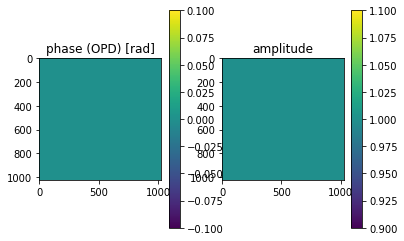

In [135]:
fig = plt.figure()
ax = fig.add_subplot(121)
q=ax.imshow(np.angle(pupa))
plt.title("phase (OPD) [rad]")
plt.colorbar(q)
ax = fig.add_subplot(122)
q=ax.imshow(np.abs(pupa))
plt.title("amplitude")
plt.colorbar(q)
plt.show()

## 円形開口マスク
望遠鏡のマスクはpupil to pupil_maskの関数である

In [149]:
pupa_perfect = pw.wg_plain_wave(n,pos_star)
mask=mc.p2pm_circular(pupa_perfect)
pupa_perfect[mask]=0.0+0.0j

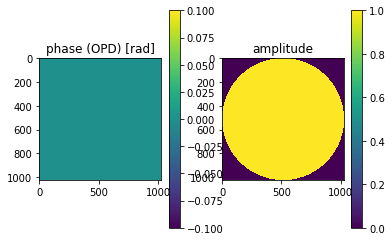

In [151]:
#表示

fig = plt.figure()
ax = fig.add_subplot(121)
q=ax.imshow(np.angle(pupa_perfect))
plt.title("phase (OPD) [rad]")
plt.colorbar(q)
ax = fig.add_subplot(122)
q=ax.imshow(np.abs(pupa_perfect))
plt.title("amplitude")
plt.colorbar(q)
plt.show()

In [162]:
exprat=8 #oversampling factor at a focal plane
foca_perfect = nc.cf_no_coronagraph(pupa_perfect,exprat=exprat)


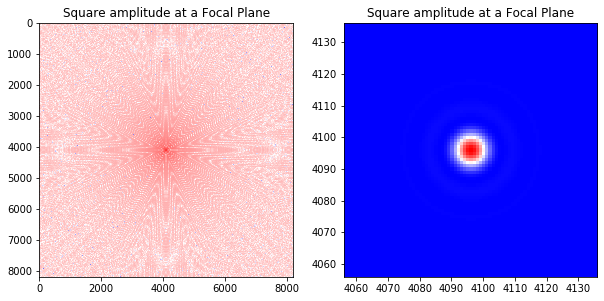

In [183]:
#表示
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(121)
a=ax.imshow(np.log10(np.abs(foca_perfect)**2),cmap="bwr")
#plt.colorbar(a)
plt.title("Square amplitude at a Focal Plane")
ax=fig.add_subplot(122)
a=ax.imshow((np.abs(foca_perfect)**2),cmap="bwr")
#plt.colorbar(a)
nx=foca_perfect.shape[0]
ny=foca_perfect.shape[1]
plt.xlim(nx/2-5*exprat,nx/2+5*exprat)
plt.ylim(ny/2-5*exprat,ny/2+5*exprat)
plt.title("Square amplitude at a Focal Plane")
plt.show()

In [189]:
n/2*exprat

4096.0

(10000000, 10000000000000)

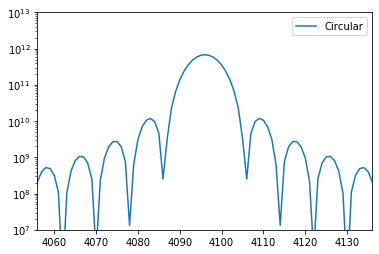

In [201]:
ifocal_perfect=np.abs(foca_perfect)**2
plt.plot(ifocal_perfect[int(n*exprat/2),:],label="Circular")
plt.legend()
plt.yscale("log")
Q=5
plt.xlim(nx/2-Q*exprat,nx/2+Q*exprat)
plt.ylim(10**7,10**13)

## Multi pupil

In [227]:
pupa = pw.wg_plain_wave(n,pos_star)
Nw=30
dl=1/(Nw+1)
dlt=1/(100+1)
mask=mc.p2pm_circular(pupa,[np.ones(Nw)*n/2,(np.array(range(Nw))+1)*dl*n],n/4*dlt)
pupa[mask]=0.0+0.0j

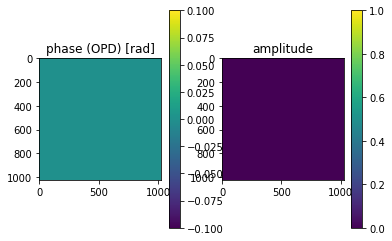

In [220]:
#表示

fig = plt.figure()
ax = fig.add_subplot(121)
q=ax.imshow(np.angle(pupa))
plt.title("phase (OPD) [rad]")
plt.colorbar(q)
ax = fig.add_subplot(122)
q=ax.imshow(np.abs(pupa))
plt.title("amplitude")
plt.colorbar(q)
plt.show()

## No coronagraph function = すなわち単にpupil -> focal plane をかけてみる。
- ここでのポイントは単に瞳での配列をFTすると焦点面での分解能は$\lambda/D$程度になってしまうため、コロナグラフ関数設計では、zero-paddingした拡大配列に入れてからFTをすることが基本となる。下のexpratは拡大率。

In [228]:
exprat=8 #oversampling factor at a focal plane
foca = nc.cf_no_coronagraph(pupa,exprat=exprat)

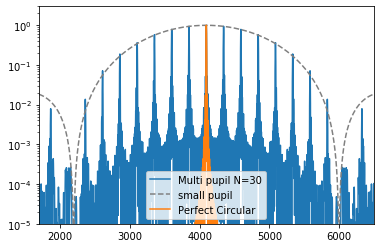

In [229]:
ifocal=np.abs(foca)**2
#plt.plot(np.abs(foca[:,int(n*exprat/2)])**2)
plt.plot(ifocal[int(n*exprat/2),:]/np.max(ifocal),label="Multi pupil N="+str(Nw))
plt.plot(ifocal[:,int(n*exprat/2)]/np.max(ifocal),label="small pupil",ls="dashed",color="gray")
plt.plot(ifocal_perfect[int(n*exprat/2),:]/np.max(ifocal_perfect),label="Perfect Circular")
plt.legend()
plt.yscale("log")
Q=300
plt.xlim(nx/2-Q*exprat,nx/2+Q*exprat)
plt.ylim(10**-5,3.0)
plt.savefig("mp"+str(Nw)+".png")

/home/kawahara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/home/kawahara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


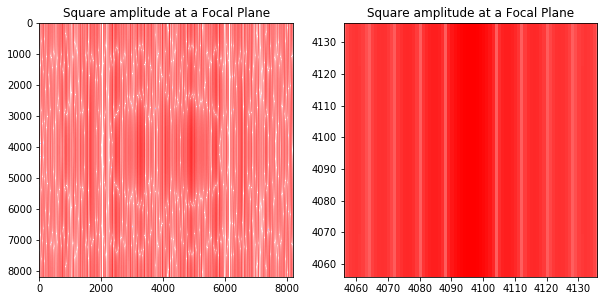

In [222]:
#表示
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(121)
a=ax.imshow(np.log10(np.abs(foca)**2),cmap="bwr")
#plt.colorbar(a)
plt.title("Square amplitude at a Focal Plane")
ax=fig.add_subplot(122)
a=ax.imshow(np.log10(np.abs(foca)**2),cmap="bwr")
#plt.colorbar(a)
nx=foca.shape[0]
ny=foca.shape[1]
plt.xlim(nx/2-5*exprat,nx/2+5*exprat)
plt.ylim(ny/2-5*exprat,ny/2+5*exprat)
plt.title("Square amplitude at a Focal Plane")
plt.show()

Airy diskが現われる